In [1]:
import random
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib_inline.backend_inline import set_matplotlib_formats
from sklearn.decomposition import LatentDirichletAllocation, NMF, PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from wordcloud import WordCloud

from database import load_data

set_matplotlib_formats("retina")

In [2]:
data = load_data()

INFO:database:Loading data: /Users/romain/Documents/dev/presidentielle-2022-programmes/data.db


In [3]:
names = data["name"]

name_tokens = list(set(re.split(" |-", " ".join(names).lower())))
stop_words = [
    "000", "001", "044", "063", "093", "00139", "00296voi",
    "la", "le", "les", "ce", "ma",
    "je", "il", "elle", "nous", "vous", "ils", "elles",
    "ai", "ont", "est", "etre", "ete", "sera", "serai", "seront", "suis", "sont",
    "nos", "notre", "votre", "sa", "son",
    "de", "du", "des", "et", "en", "un", "une", "ans", "au", "aux", "se", "me", "ne", "ni", "ou",
    "qu", "que", "qui", "rai",
    "pas", "par", "pour", "dans", "dont", "sur", "avec", "contre", "mais", "plus", "jusqu",
    "france", "francais",
    *name_tokens,
]

vectorizer = TfidfVectorizer(strip_accents="unicode", lowercase=True, stop_words=stop_words)
vec_program = vectorizer.fit_transform(data["program_text"])
vec_feature_names = vectorizer.get_feature_names_out()

In [4]:
freqs = pd.DataFrame(vec_program.toarray(), columns=vec_feature_names)
word_clouds = [
    (
        data.iloc[i]["name"],
        WordCloud(width=800, height=400).generate_from_frequencies(freqs.iloc[i]),
    )
    for i in range(len(data.index))
]

In [5]:
neighbors = NearestNeighbors(n_neighbors=4).fit(vec_program.toarray())
distances, indices = neighbors.kneighbors(vec_program.toarray())

names = data["name"]
nearest_neighbors = np.array(
    [
        [names[ind[0]], names[ind[1]], names[ind[2]], names[ind[3]]]
        for ind in indices
    ]
)

In [6]:
df_corr = pd.DataFrame(vec_program.toarray().T, columns=names).corr().abs()
df_corr.style.background_gradient(cmap="viridis").format(precision=2)

name,Madame Nathalie ARTHAUD,Monsieur Nicolas DUPONT-AIGNAN,Madame Anne HIDALGO,Monsieur Yannick JADOT,Monsieur Jean LASSALLE,Madame Marine LE PEN,Monsieur Emmanuel MACRON,Monsieur Jean-Luc MELENCHON,Madame Valerie PECRESSE,Monsieur Philippe POUTOU,Monsieur Fabien ROUSSEL,Monsieur Eric ZEMMOUR
name,,,,,,,,,,,,
Madame Nathalie ARTHAUD,1.00,0.04,0.04,0.01,0.03,0.00,0.01,0.02,0.01,0.09,0.09,0.01
Monsieur Nicolas DUPONT-AIGNAN,0.04,1.00,0.02,0.00,0.01,0.01,0.01,0.01,0.03,0.02,0.03,0.02
Madame Anne HIDALGO,0.04,0.02,1.00,0.12,0.04,0.07,0.09,0.11,0.07,0.05,0.15,0.02
Monsieur Yannick JADOT,0.01,0.00,0.12,1.00,0.01,0.01,0.04,0.07,0.07,0.06,0.15,0.03
Monsieur Jean LASSALLE,0.03,0.01,0.04,0.01,1.00,0.00,0.01,0.01,0.02,0.01,0.03,0.04
Madame Marine LE PEN,0.00,0.01,0.07,0.01,0.00,1.00,0.01,0.03,0.05,0.02,0.04,0.06
Monsieur Emmanuel MACRON,0.01,0.01,0.09,0.04,0.01,0.01,1.00,0.04,0.05,0.01,0.06,0.00
Monsieur Jean-Luc MELENCHON,0.02,0.01,0.11,0.07,0.01,0.03,0.04,1.00,0.01,0.07,0.13,0.00
Madame Valerie PECRESSE,0.01,0.03,0.07,0.07,0.02,0.05,0.05,0.01,1.00,0.02,0.08,0.05


In [7]:
nmf = NMF(n_components=5, init="nndsvda").fit(vec_program.toarray())
for i in range(nmf.n_components):
    print(f"Thème {i}:", vec_feature_names[np.argpartition(nmf.components_[i], -5)[-5:]])

Thème 0: ['vivre' 'europe' 'climat' 'ecologie' 'euros']
Thème 1: ['mes' 'veux' 'delinquants' 'pays' 'immigration']
Thème 2: ['ceux' 'capitalistes' 'profits' 'voulons' 'travailleurs']
Thème 3: ['europeenne' '20' 'politique' 'liberons' 'suppression']
Thème 4: ['frontieres' 'voterez' 'confance' 'faisant' 'pacte']


# 🗳️ Natural Language of Politics

> Romain Clement, 2022

Analyse des programmes des candidats à la présidentielle 2022 sous l'angle du traitement du langage naturel (NLP)

## Objectifs

- Vision objective
- Eléments différenciants
- Affinités politiques

**... bonne excuse pour de la data, de l'IA et du NLP !**

## Qui est-ce ?

Devinez à quel candidat appartiennent ces programmes !

In [8]:
sample_word_clouds = random.sample(word_clouds, 3)

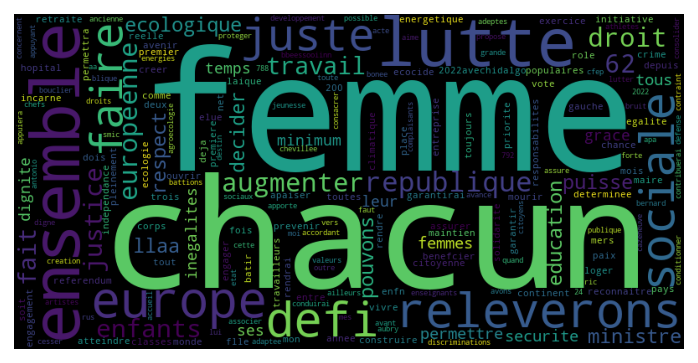

In [9]:
_ = plt.imshow(sample_word_clouds[0][1])
_ = plt.axis("off")

In [10]:
print(sample_word_clouds[0][0])

Madame Anne HIDALGO


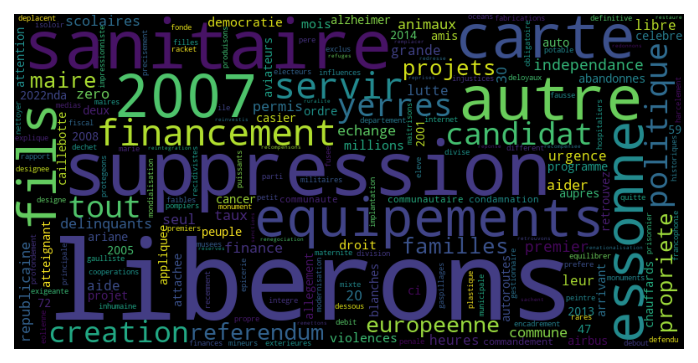

In [11]:
_ = plt.imshow(sample_word_clouds[1][1])
_ = plt.axis("off")

In [12]:
print(sample_word_clouds[1][0])

Monsieur Nicolas DUPONT-AIGNAN


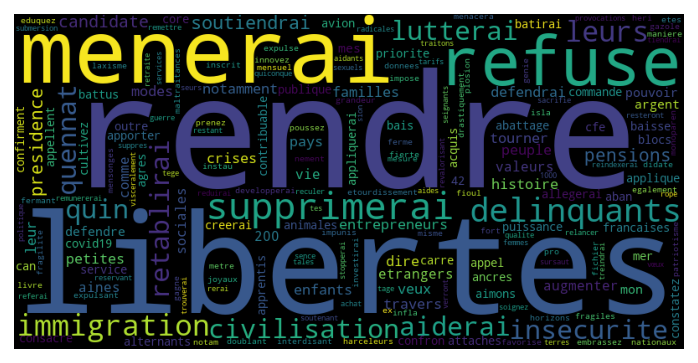

In [13]:
_ = plt.imshow(sample_word_clouds[2][1])
_ = plt.axis("off")

In [14]:
print(sample_word_clouds[2][0])

Madame Marine LE PEN


## Et plus si affinités

Quels sont les 3 voisins les plus proches de chaque candidat ?

In [15]:
voisins = pd.DataFrame(nearest_neighbors, columns=["Candidat", "Voisin 1", "Voisin 2", "Voisin 3"])
sample_voisins = voisins.sample(3)

In [16]:
print("Candidat :", sample_voisins.iloc[0]["Candidat"])

Candidat : Madame Marine LE PEN


In [17]:
print("Voisin 1 :", sample_voisins.iloc[0]["Voisin 1"])

Voisin 1 : Monsieur Eric ZEMMOUR


In [18]:
print("Voisin 2 :", sample_voisins.iloc[0]["Voisin 2"])

Voisin 2 : Madame Anne HIDALGO


In [19]:
print("Voisin 3 :", sample_voisins.iloc[0]["Voisin 3"])

Voisin 3 : Madame Valerie PECRESSE


In [20]:
print("Candidat :", sample_voisins.iloc[1]["Candidat"])

Candidat : Monsieur Philippe POUTOU


In [21]:
print("Voisin 1 :", sample_voisins.iloc[1]["Voisin 1"])

Voisin 1 : Monsieur Fabien ROUSSEL


In [22]:
print("Voisin 2 :", sample_voisins.iloc[1]["Voisin 2"])

Voisin 2 : Madame Nathalie ARTHAUD


In [23]:
print("Voisin 3 :", sample_voisins.iloc[1]["Voisin 3"])

Voisin 3 : Monsieur Jean-Luc MELENCHON


In [24]:
print("Candidat :", sample_voisins.iloc[2]["Candidat"])

Candidat : Madame Valerie PECRESSE


In [25]:
print("Voisin 1 :", sample_voisins.iloc[2]["Voisin 1"])

Voisin 1 : Madame Anne HIDALGO


In [26]:
print("Voisin 2 :", sample_voisins.iloc[2]["Voisin 2"])

Voisin 2 : Monsieur Eric ZEMMOUR


In [27]:
print("Voisin 3 :", sample_voisins.iloc[2]["Voisin 3"])

Voisin 3 : Monsieur Fabien ROUSSEL


In [28]:
voisins.iloc[:6]

,Candidat,Voisin 1,Voisin 2,Voisin 3
0,Madame Nathalie ARTHAUD,Monsieur Philippe POUTOU,Monsieur Fabien ROUSSEL,Madame Anne HIDALGO
1,Monsieur Nicolas DUPONT-AIGNAN,Monsieur Eric ZEMMOUR,Madame Valerie PECRESSE,Madame Anne HIDALGO
2,Madame Anne HIDALGO,Monsieur Fabien ROUSSEL,Monsieur Jean-Luc MELENCHON,Monsieur Yannick JADOT
3,Monsieur Yannick JADOT,Monsieur Fabien ROUSSEL,Madame Anne HIDALGO,Madame Valerie PECRESSE
4,Monsieur Jean LASSALLE,Madame Anne HIDALGO,Madame Valerie PECRESSE,Monsieur Fabien ROUSSEL
5,Madame Marine LE PEN,Monsieur Eric ZEMMOUR,Madame Anne HIDALGO,Madame Valerie PECRESSE


In [29]:
voisins.iloc[6:]

,Candidat,Voisin 1,Voisin 2,Voisin 3
6,Monsieur Emmanuel MACRON,Madame Anne HIDALGO,Madame Valerie PECRESSE,Monsieur Fabien ROUSSEL
7,Monsieur Jean-Luc MELENCHON,Madame Anne HIDALGO,Monsieur Fabien ROUSSEL,Monsieur Philippe POUTOU
8,Madame Valerie PECRESSE,Madame Anne HIDALGO,Monsieur Eric ZEMMOUR,Monsieur Fabien ROUSSEL
9,Monsieur Philippe POUTOU,Monsieur Fabien ROUSSEL,Madame Nathalie ARTHAUD,Monsieur Jean-Luc MELENCHON
10,Monsieur Fabien ROUSSEL,Madame Anne HIDALGO,Monsieur Yannick JADOT,Monsieur Jean-Luc MELENCHON
11,Monsieur Eric ZEMMOUR,Madame Valerie PECRESSE,Madame Marine LE PEN,Madame Anne HIDALGO


## Thématiques

Quels sont les principaux thèmes de cette campagne ?

## Questions

Merci pour votre attention ! Questions ?

## Contact

![Business Card](https://business-card-generator.vercel.app/vcard.svg?nickname=&birthday=&state=&job=Data+%7C+AI+%7C+Trainer&picture=&card_type=vcard&firstname=Romain&lastname=Clement&street=&email=contact%2Bmeetup%40romain-clement.net&city=&company=Freelance&country=&phone=&website=https%3A%2F%2Fromain-clement.net&zipcode=)

**Romain Clement**<br>
Data | IA | Formation<br>
https://romain-clement.net<br>